# AI300 Machine Learning Capstone Project - T08
Group Members: Dorcas Shee Shi En, Wong Xiao Fang

## Import Project Dataset from SQL

In [1]:
import pandas as pd
from sqlalchemy import create_engine

C:\Users\wxf11\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\wxf11\AppData\Local\Temp\ipykernel_30624\759018811.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
ENDPOINT = 'heicoders-playground.c2ced10ceyki.ap-southeast-1.rds.amazonaws.com'
PORT = 3306
USERNAME = 'student300'
PASSWORD = 'heicoders_AI300'
DBNAME = 'ai300_capstone'

In [3]:
database_conn = create_engine(f'mysql+pymysql://{USERNAME}:{PASSWORD}@{ENDPOINT}:{PORT}/{DBNAME}')

In [4]:
tables = ['account', 'account_usage', 'churn_status', 'city', 'customer']

### Create Dataframes for Easy Manipulation in Python ###

In [5]:
dataframes = {}

for table in tables:
    dataframes[table] = pd.read_sql(table, database_conn)

customer_df = dataframes['customer']
account_df = dataframes['account']
account_usage_df = dataframes['account_usage']
churn_df = dataframes['churn_status']
city_df = dataframes['city']

In [6]:
for table in tables:
    print(f"capstone.{table}")
    print(f'Dataframe shape: {dataframes[table].shape}')
    display(dataframes[table].head())
    print()

capstone.account
Dataframe shape: (7043, 16)


,account_id,customer_id,tenure_months,num_referrals,has_internet_service,internet_type,has_unlimited_data,has_phone_service,has_multiple_lines,has_premium_tech_support,has_online_security,has_online_backup,has_device_protection,contract_type,paperless_billing,payment_method
0,AAJU-HMJLK,0334-ZFJSR,55,0,Yes,Cable,No,Yes,Yes,Yes,Yes,Yes,No,One Year,Yes,Credit Card
1,AAKY-HUGJV,6235-VDHOM,5,0,Yes,DSL,Yes,No,No,No,No,Yes,No,Month-to-Month,No,Bank Withdrawal
2,AAMB-TJYWC,4006-HKYHO,63,0,Yes,DSL,Yes,Yes,No,Yes,Yes,Yes,Yes,Two Year,Yes,Bank Withdrawal
3,AANL-MWPZF,3258-SYSWS,72,0,Yes,Fiber Optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,No,Bank Withdrawal
4,AAOS-KANBS,5360-XGYAZ,72,1,Yes,DSL,No,No,No,Yes,Yes,Yes,Yes,Two Year,Yes,Bank Withdrawal



capstone.account_usage
Dataframe shape: (7043, 10)


,account_id,avg_long_distance_fee_monthly,total_long_distance_fee,avg_gb_download_monthly,stream_tv,stream_movie,stream_music,total_monthly_fee,total_charges_quarter,total_refunds
0,AAJU-HMJLK,35.38,1945.90,13,No,No,No,66.05,3462.10,44.53
1,AAKY-HUGJV,0.00,0.00,26,No,No,No,28.45,131.05,0.00
2,AAMB-TJYWC,29.58,1863.54,47,Yes,Yes,Yes,86.70,5309.50,0.00
3,AANL-MWPZF,24.67,1776.24,26,Yes,Yes,No,113.80,7845.80,0.00
4,AAOS-KANBS,0.00,0.00,16,Yes,Yes,Yes,65.65,4664.50,0.00



capstone.churn_status
Dataframe shape: (7043, 5)


,customer_id,status,churn_label,churn_category,churn_reason
0,0002-ORFBO,Stayed,No,,
1,0003-MKNFE,Stayed,No,,
2,0004-TLHLJ,Churned,Yes,Competitor,Competitor had better devices
3,0011-IGKFF,Churned,Yes,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Churned,Yes,Dissatisfaction,Network reliability



capstone.city
Dataframe shape: (1626, 6)


,area_id,zip_code,city,latitutde,longitude,population
0,1,90001,Los Angeles,33.973616,-118.249020,54492
1,2,90002,Los Angeles,33.949255,-118.246978,44586
2,3,90003,Los Angeles,33.964131,-118.272783,58198
3,4,90004,Los Angeles,34.076259,-118.310715,67852
4,5,90005,Los Angeles,34.059281,-118.307420,43019



capstone.customer
Dataframe shape: (7043, 7)


,customer_id,gender,age,senior_citizen,married,num_dependents,zip_code
0,0002-ORFBO,Female,37,No,Yes,0,93225
1,0003-MKNFE,Male,46,No,No,0,91206
2,0004-TLHLJ,Male,50,No,No,0,92627
3,0011-IGKFF,Male,78,Yes,Yes,0,94553
4,0013-EXCHZ,Female,75,Yes,Yes,0,93010


### Perform Joins to Combine Relevant Data from Tables

#### Create A Consolidated Table with Customers' Account Information (Including Churn Status) ####

In [7]:
query = """
SELECT *
FROM customer
JOIN city 
    ON customer.zip_code = city.zip_code
JOIN account
    ON customer.customer_id = account.customer_id
JOIN account_usage 
    ON account.account_id = account_usage.account_id
JOIN churn_status
    ON account.customer_id = churn_status.customer_id;    
"""
account_details = pd.read_sql(query, database_conn)

# drop duplicated account_id and customer_id columns
account_details = account_details.loc[:, ~account_details.columns.duplicated()]

In [8]:
display(account_details.head())
print(f'Dataframe shape: {account_details.shape}')

,customer_id,gender,age,senior_citizen,married,num_dependents,zip_code,area_id,city,latitutde,...,stream_tv,stream_movie,stream_music,total_monthly_fee,total_charges_quarter,total_refunds,status,churn_label,churn_category,churn_reason
0,0013-EXCHZ,Female,75,Yes,Yes,0,93010,607,Camarillo,34.227846,...,Yes,No,No,83.90,267.40,0.0,Churned,Yes,Dissatisfaction,Network reliability
1,0014-BMAQU,Male,52,No,Yes,0,94558,963,Napa,38.489789,...,No,No,No,84.65,5377.80,0.0,Stayed,No,,
2,0016-QLJIS,Female,43,No,Yes,1,95681,1390,Sheridan,38.984756,...,Yes,Yes,Yes,90.45,5957.90,0.0,Stayed,No,,
3,0019-EFAEP,Female,32,No,No,0,91942,303,La Mesa,32.782501,...,Yes,No,No,101.30,7261.25,0.0,Stayed,No,,
4,0019-GFNTW,Female,39,No,No,0,93441,716,Los Olivos,34.704340,...,No,No,No,45.05,2560.10,0.0,Stayed,No,,


Dataframe shape: (7043, 40)


## Exploratory Data Analysis

### List of features in `account_details`

In [9]:
account_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    7043 non-null   object 
 1   gender                         7043 non-null   object 
 2   age                            7043 non-null   int64  
 3   senior_citizen                 7043 non-null   object 
 4   married                        7043 non-null   object 
 5   num_dependents                 7043 non-null   int64  
 6   zip_code                       7043 non-null   int64  
 7   area_id                        7043 non-null   int64  
 8   city                           7043 non-null   object 
 9   latitutde                      7043 non-null   float64
 10  longitude                      7043 non-null   float64
 11  population                     7043 non-null   int64  
 12  account_id                     7043 non-null   o

### Treatment of Missing Values ####

In [10]:
print(account_details.isna().sum())

customer_id                      0
gender                           0
age                              0
senior_citizen                   0
married                          0
num_dependents                   0
zip_code                         0
area_id                          0
city                             0
latitutde                        0
longitude                        0
population                       0
account_id                       0
tenure_months                    0
num_referrals                    0
has_internet_service             0
internet_type                    0
has_unlimited_data               0
has_phone_service                0
has_multiple_lines               0
has_premium_tech_support         0
has_online_security              0
has_online_backup                0
has_device_protection            0
contract_type                    0
paperless_billing                0
payment_method                   0
avg_long_distance_fee_monthly    0
total_long_distance_

In [11]:
account_details.nunique()

customer_id                      7043
gender                              2
age                                62
senior_citizen                      2
married                             2
num_dependents                     10
zip_code                         1626
area_id                          1626
city                             1106
latitutde                        1626
longitude                        1625
population                       1569
account_id                       7043
tenure_months                      72
num_referrals                      12
has_internet_service                2
internet_type                       4
has_unlimited_data                  2
has_phone_service                   2
has_multiple_lines                  2
has_premium_tech_support            2
has_online_security                 2
has_online_backup                   2
has_device_protection               2
contract_type                       3
paperless_billing                   2
payment_meth

In [12]:
churn_features = ['status', 'churn_label','churn_category', 'churn_reason']

display(account_details[churn_features].groupby(by='churn_label').count())
display(account_details.loc[account_details['churn_label'] == '', churn_features].head())

,status,churn_category,churn_reason
churn_label,,,
,52,52,52
No,5174,5174,5174
Yes,1817,1817,1817


,status,churn_label,churn_category,churn_reason
46,Churned,,Other,Deceased
152,Churned,,Other,Moved
269,Churned,,Other,Deceased
402,Churned,,Other,Moved
500,Churned,,Other,Moved


#### Analysis:
There are 52 records in our target variable, `churn_label`, with empty strings. These records reflect the `status` **"Churned"**, a `churn_category` of **"Other"**, and `churn_reason` as **"Moved"** or **"Deceased"**.  
  
Hence, we will update the `churn_label` value for these 52 records to **"Yes"**.

In [13]:
account_details['churn_label'] = account_details['churn_label'].replace(to_replace='', value='Yes')

In [14]:
# check that empty strings were replaced successfully
account_details[churn_features].groupby(by='churn_label').count()

,status,churn_category,churn_reason
churn_label,,,
No,5174,5174,5174
Yes,1869,1869,1869


## Label Encoding and Feature Scaling

### Label Encoding for Categorical Variables

In [15]:
columns_to_encode = [
    "senior_citizen",
    "married",
    "churn_label",
    "has_internet_service", 
    "has_unlimited_data", 
    "has_phone_service", 
    "has_multiple_lines", 
    "has_premium_tech_support",
    "has_online_security", 
    "has_online_backup", 
    "has_device_protection",
    "paperless_billing", 
    "stream_tv", 
    "stream_movie", 
    "stream_music" 
]

In [16]:
account_details[columns_to_encode] = account_details[columns_to_encode].replace(to_replace={"Yes": 1, "No": 0})

C:\Users\wxf11\AppData\Local\Temp\ipykernel_30624\2631211819.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  account_details[columns_to_encode] = account_details[columns_to_encode].replace(to_replace={"Yes": 1, "No": 0})


In [17]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

le = LabelEncoder()
account_details['internet_type'] = le.fit_transform(account_details['internet_type'])
account_details['status'] = le.fit_transform(account_details['status'])
account_details['gender'] = le.fit_transform(account_details['gender'])

In [18]:
account_details.head()

,customer_id,gender,age,senior_citizen,married,num_dependents,zip_code,area_id,city,latitutde,...,stream_tv,stream_movie,stream_music,total_monthly_fee,total_charges_quarter,total_refunds,status,churn_label,churn_category,churn_reason
0,0013-EXCHZ,0,75,1,1,0,93010,607,Camarillo,34.227846,...,1,0,0,83.90,267.40,0.0,0,1,Dissatisfaction,Network reliability
1,0014-BMAQU,1,52,0,1,0,94558,963,Napa,38.489789,...,0,0,0,84.65,5377.80,0.0,2,0,,
2,0016-QLJIS,0,43,0,1,1,95681,1390,Sheridan,38.984756,...,1,1,1,90.45,5957.90,0.0,2,0,,
3,0019-EFAEP,0,32,0,0,0,91942,303,La Mesa,32.782501,...,1,0,0,101.30,7261.25,0.0,2,0,,
4,0019-GFNTW,0,39,0,0,0,93441,716,Los Olivos,34.704340,...,0,0,0,45.05,2560.10,0.0,2,0,,


### Feature Scaling For Numeric Variables

In [19]:
columns_to_scale = ['total_monthly_fee', 
                    'total_charges_quarter', 
                    'avg_long_distance_fee_monthly', 
                    'total_long_distance_fee', 
                    'population']

scaler = MinMaxScaler()
account_details[columns_to_scale] = scaler.fit_transform(account_details[columns_to_scale])

# scaler = StandardScaler()
# account_details[columns_to_scale] = scaler.fit_transform(account_details[columns_to_scale])

In [20]:
account_details.head()

,customer_id,gender,age,senior_citizen,married,num_dependents,zip_code,area_id,city,latitutde,...,stream_tv,stream_movie,stream_music,total_monthly_fee,total_charges_quarter,total_refunds,status,churn_label,churn_category,churn_reason
0,0013-EXCHZ,0,75,1,1,0,93010,607,Camarillo,34.227846,...,1,0,0,0.653234,0.028687,0.0,0,1,Dissatisfaction,Network reliability
1,0014-BMAQU,1,52,0,1,0,94558,963,Napa,38.489789,...,0,0,0,0.660697,0.618394,0.0,2,0,,
2,0016-QLJIS,0,43,0,1,1,95681,1390,Sheridan,38.984756,...,1,1,1,0.718408,0.685333,0.0,2,0,,
3,0019-EFAEP,0,32,0,0,0,91942,303,La Mesa,32.782501,...,1,0,0,0.826368,0.835732,0.0,2,0,,
4,0019-GFNTW,0,39,0,0,0,93441,716,Los Olivos,34.704340,...,0,0,0,0.266667,0.293249,0.0,2,0,,


## Correlation Analysis, Data Visualisation and Feature Selection ####

### Correlation Analysis

In [21]:
# Calculate the correlation matrix
correlation_matrix = account_details.corr(numeric_only=True)

# Extract the correlation values for 'churn_label' from the correlation matrix
churn_correlation = correlation_matrix['churn_label'].sort_values(ascending=False)

# Display the correlation values for 'churn_label'
print(churn_correlation)

churn_label                      1.000000
has_internet_service             0.227890
total_monthly_fee                0.193356
paperless_billing                0.191825
has_unlimited_data               0.166545
senior_citizen                   0.150889
age                              0.115760
stream_tv                        0.063228
stream_movie                     0.061382
population                       0.051649
avg_gb_download_monthly          0.048868
stream_music                     0.045587
has_multiple_lines               0.040102
longitude                        0.024052
has_phone_service                0.011942
avg_long_distance_fee_monthly    0.008120
gender                          -0.008612
zip_code                        -0.016289
area_id                         -0.022166
total_refunds                   -0.033709
latitutde                       -0.041546
internet_type                   -0.050694
has_device_protection           -0.066160
has_online_backup               -0

### Data Visualisation

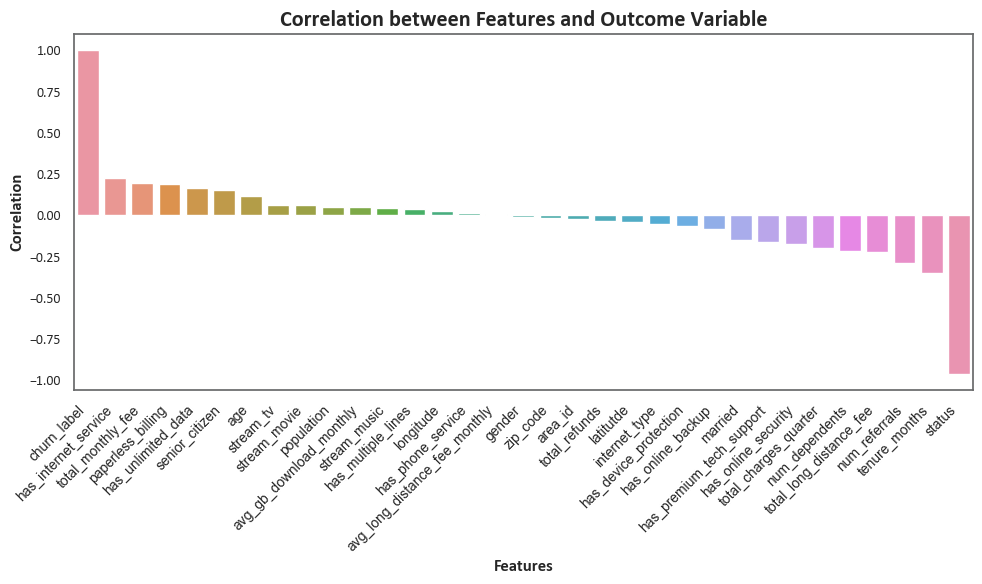

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set(style="white")

# Create a bar plot for churn correlation
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_correlation.index, y=churn_correlation.values)

plt.title('Correlation between Features and Outcome Variable',
         fontsize=16, fontweight='bold', fontname='Calibri')
plt.xlabel('Features', fontweight='bold', fontname='Calibri')
plt.ylabel('Correlation', fontweight='bold', fontname='Calibri')

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10, fontname='Calibri')

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_color('#696a6b')

plt.tight_layout()
plt.grid(False)
plt.show()

#### Analysis:
Based on the correlation analysis, we have identified the following features to have a stronger correlation with `churn_label`:
1. `has_internet_service` 
2. `total_monthly_fee`
3. `paperless_billing`
4. `has_unlimited_data`
5. `has_premium_tech_support`
6. `has_online_security`
7. `total_charges_quarter`
7. `total_long_distance_fee`
8. `num_referrals`
9. `tenure_months`
10. `age`
11. `married`
12. `senior_citizen`
13. `num_dependents`
  
Hence, they are more relevant to our analysis.  
**Note**: We omitted `status` as including it gives our model an AUC of 1.

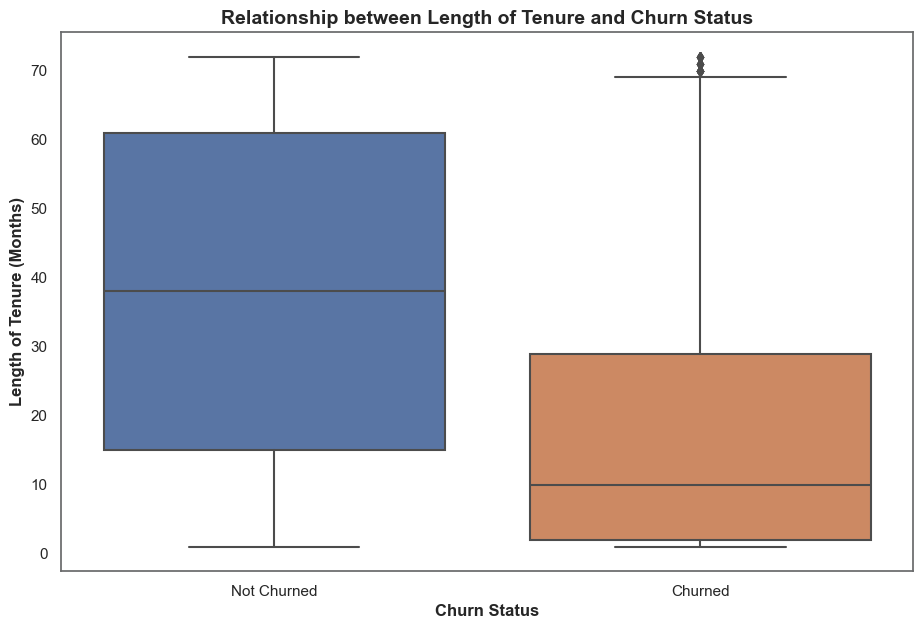

In [23]:
# Create a boxplot
plt.figure(figsize=(11,7))
sns.boxplot(x='churn_label', y='tenure_months', data=account_details)

plt.title('Relationship between Length of Tenure and Churn Status',
         fontsize=14, fontweight='bold')
plt.xlabel('Churn Status', fontweight='bold')
plt.ylabel('Length of Tenure (Months)', fontweight='bold')
plt.xticks([0, 1], ['Not Churned', 'Churned'])

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_color('#696a6b')

    plt.grid(False)
plt.show()

#### Analysis:
Customers with shorter tenures seem to be more likely to "churn".

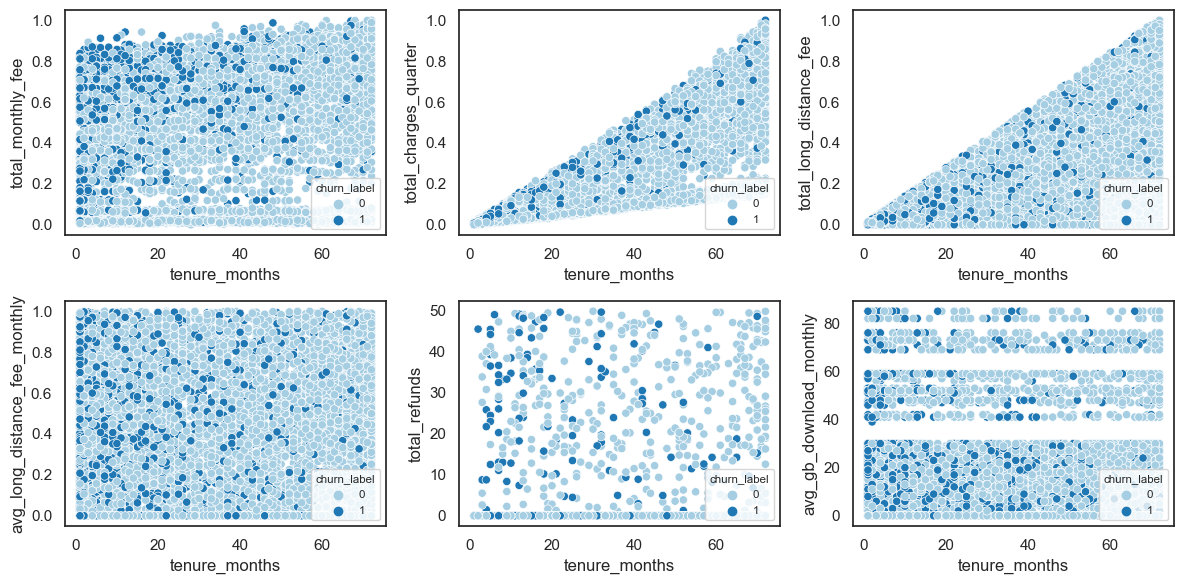

In [24]:
features = ['total_monthly_fee',
            'total_charges_quarter',
            'total_long_distance_fee',
            'avg_long_distance_fee_monthly',
            'total_refunds',
            'avg_gb_download_monthly']

fig, axes = plt.subplots(2,3,figsize=(12,6))
axes = axes.ravel()

for idx, f in enumerate(features):
    sns.scatterplot(data=account_details, x='tenure_months', y=f, ax=axes[idx], hue='churn_label', palette='Paired')
    sns.move_legend(axes[idx], "lower right", title_fontsize='x-small', fontsize='x-small')
    
plt.tight_layout()
plt.show()

#### Analysis:
Customers who have shorter tenures tend to churn if their monthly and quarterly fees (total and on average), are higher. These customers also tend to churn when their average monthly downloads are lower (probably because they are using it lesser).  
The `total_long_distance_fee` does not seem to much relationship between `churn_label` and `tenure_momths`, so we will omit it from the selected features.

### Feature Selection and Splitting the Dataset

In [25]:
# Select features to predict churn_label
X = account_details[['age',
                     'married',
                     'tenure_months',
                     'paperless_billing',
                     'has_internet_service',
                     'has_unlimited_data', 
                     'has_premium_tech_support',
                     'total_monthly_fee', 
                     'total_charges_quarter',
                     'avg_long_distance_fee_monthly'
]]

y = account_details['churn_label']

In [26]:
selected_columns = ['age',
                    'married',
                    'tenure_months',
                    'paperless_billing',
                    'has_internet_service',
                    'has_unlimited_data', 
                    'has_premium_tech_support',
                    'total_monthly_fee', 
                    'total_charges_quarter',
                    'avg_long_distance_fee_monthly'
]

# View the selected columns
account_details_selected = account_details[selected_columns]

# Display the first few rows of the selected dataframe
print(account_details_selected.head())

   age  married  tenure_months  paperless_billing  has_internet_service  \
0   75        1              3                  1                     1   
1   52        1             63                  1                     1   
2   43        1             65                  1                     1   
3   32        0             72                  1                     1   
4   39        0             56                  0                     1   

   has_unlimited_data  has_premium_tech_support  total_monthly_fee  \
0                   1                         1           0.653234   
1                   0                         1           0.660697   
2                   1                         1           0.718408   
3                   1                         0           0.826368   
4                   1                         1           0.266667   

   total_charges_quarter  avg_long_distance_fee_monthly  
0               0.028687                       0.147630  
1           

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model Building and Evaluation

### Logistic Regression ####

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix

In [29]:
logreg_model = LogisticRegression(random_state=42)
logreg_model = logreg_model.fit(X_train, y_train)
y_pred_proba = logreg_model.predict_proba(X_test)[:,1]

C:\Users\wxf11\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
auc_score = roc_auc_score(y_test, y_pred_proba)
print('AUC:', auc_score)

AUC: 0.8140536678644223


Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1566
           1       0.62      0.50      0.55       547

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113



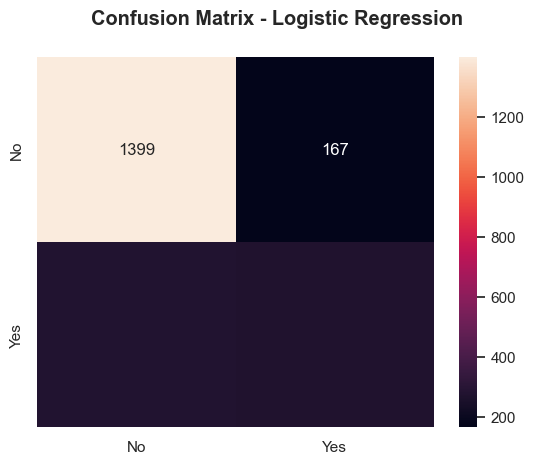

In [31]:
outcome_classes = {0:'No', 1:'Yes'}
y_pred = logreg_model.predict(X_test)

lr_cm = confusion_matrix(y_test, y_pred)
lr_cr = classification_report(y_test, y_pred)

print('Classification Report - Logistic Regression')
print(lr_cr)

fig = plt.figure()
sns.heatmap(lr_cm, annot=True, fmt='d', xticklabels=outcome_classes.values(), yticklabels=outcome_classes.values())
fig.suptitle('Confusion Matrix - Logistic Regression', fontweight='bold')
plt.show()

### Random Forest Classifier ####

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rfc_model = RandomForestClassifier(
    n_estimators=200,  
    max_depth=20,    
    min_samples_split=10,  
    min_samples_leaf=4,   
    random_state=42
)

rfc_model.fit(X_train, y_train)

y_pred_proba = rfc_model.predict_proba(X_test)[:, 1]

auc_score = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc_score)

AUC Score: 0.8124975192679915


Classification Report - Random Forest Classifier
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1566
           1       0.64      0.49      0.55       547

    accuracy                           0.80      2113
   macro avg       0.74      0.69      0.71      2113
weighted avg       0.78      0.80      0.79      2113



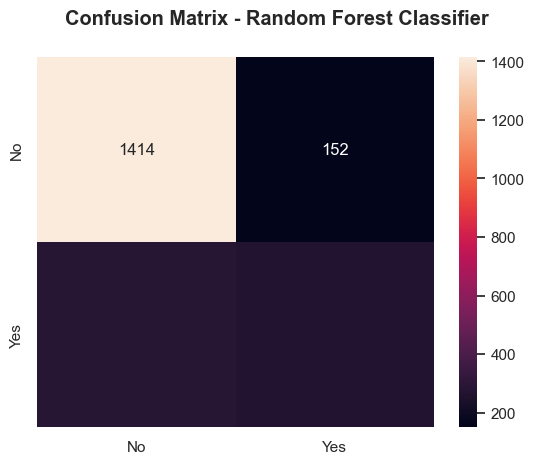

In [34]:
y_pred = rfc_model.predict(X_test)

rfc_cm = confusion_matrix(y_test, y_pred)
rfc_cr = classification_report(y_test, y_pred)

print('Classification Report - Random Forest Classifier')
print(rfc_cr)

fig = plt.figure()
sns.heatmap(rfc_cm, annot=True, fmt='d', xticklabels=outcome_classes.values(), yticklabels=outcome_classes.values())
fig.suptitle('Confusion Matrix - Random Forest Classifier', fontweight='bold')
plt.show()

### Gradient Boosting Classifier ###

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,  # Adjust max_depth
    min_samples_split=2,  # Adjust min_samples_split
    min_samples_leaf=1,  # Adjust min_samples_leaf
    min_weight_fraction_leaf=0.0,  # Adjust min_weight_fraction_leaf
    max_leaf_nodes=None,  # Adjust max_leaf_nodes
    max_features='sqrt',  # Adjust max_features
    random_state=42
)

gbc_model.fit(X_train, y_train)

y_pred_proba = gbc_model.predict_proba(X_test)[:, 1]

auc_score = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc_score)

AUC Score: 0.8159600374502978


Classification Report - Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1566
           1       0.59      0.48      0.53       547

    accuracy                           0.78      2113
   macro avg       0.71      0.68      0.69      2113
weighted avg       0.77      0.78      0.77      2113



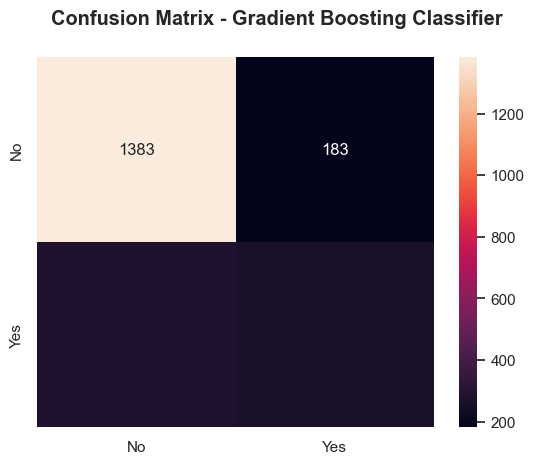

In [36]:
y_pred = gbc_model.predict(X_test)

gbc_cm = confusion_matrix(y_test, y_pred)
gbc_cr = classification_report(y_test, y_pred)

print('Classification Report - Gradient Boosting Classifier')
print(gbc_cr)

fig = plt.figure()
sns.heatmap(gbc_cm, annot=True, fmt='d', xticklabels=outcome_classes.values(), yticklabels=outcome_classes.values())
fig.suptitle('Confusion Matrix - Gradient Boosting Classifier', fontweight='bold')
plt.show()

### XGBoost ###

In [37]:
import xgboost as xgb
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

xgb_model = xgb.XGBClassifier(
    n_estimators=100,   # Number of boosting rounds
    learning_rate=0.1,  # Step size shrinkage to prevent overfitting
    max_depth=3,        # Maximum depth of a tree
    subsample=0.8,      # Fraction of samples used for fitting the trees
    colsample_bytree=0.8,  # Fraction of features used for fitting the trees
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

auc_score = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc_score)

AUC Score: 0.8193174893357709


Classification Report - XGBoost
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1566
           1       0.62      0.48      0.54       547

    accuracy                           0.79      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.78      0.79      0.78      2113



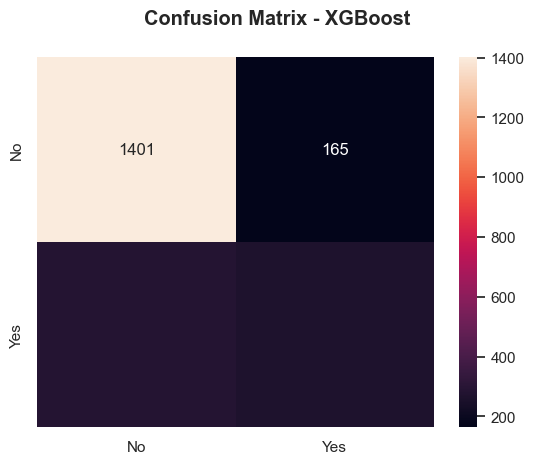

In [38]:
y_pred = xgb_model.predict(X_test)

xgb_cm = confusion_matrix(y_test, y_pred)
xgb_cr = classification_report(y_test, y_pred)

print('Classification Report - XGBoost')
print(xgb_cr)

fig = plt.figure()
sns.heatmap(xgb_cm, annot=True, fmt='d', xticklabels=outcome_classes.values(), yticklabels=outcome_classes.values())
fig.suptitle('Confusion Matrix - XGBoost', fontweight='bold')
plt.show()

### CatBoost ###

In [39]:
from catboost import CatBoostClassifier

cbc_model = CatBoostClassifier(
    iterations=100,  # Number of boosting rounds
    learning_rate=0.1,  # Step size shrinkage to prevent overfitting
    depth=6,  # Depth of the trees
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

cbc_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=10, verbose=50)

y_pred_proba = cbc_model.predict_proba(X_test)[:, 1]

auc_score = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc_score)

0:	learn: 0.6560229	test: 0.6577518	best: 0.6577518 (0)	total: 147ms	remaining: 14.5s
50:	learn: 0.4065570	test: 0.4332886	best: 0.4332886 (50)	total: 279ms	remaining: 268ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.4325218708
bestIteration = 81

Shrink model to first 82 iterations.
AUC Score: 0.8244225439585713


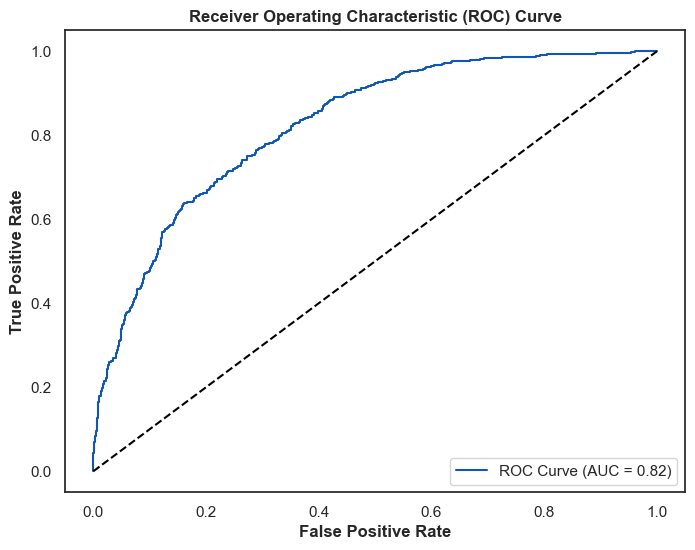

In [40]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='#1057b3', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlabel('False Positive Rate', fontweight='bold')
plt.ylabel('True Positive Rate', fontweight='bold')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontweight='bold')

plt.legend(loc="lower right")
plt.show()

Classification Report - CatBoost
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1566
           1       0.63      0.48      0.54       547

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.70      2113
weighted avg       0.78      0.79      0.78      2113



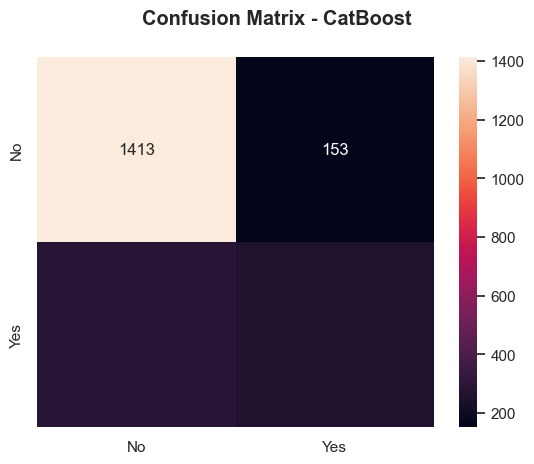

In [41]:
y_pred = cbc_model.predict(X_test)

cbc_cm = confusion_matrix(y_test, y_pred)
cbc_cr = classification_report(y_test, y_pred)

print('Classification Report - CatBoost')
print(cbc_cr)

fig = plt.figure()
sns.heatmap(cbc_cm, annot=True, fmt='d', xticklabels=outcome_classes.values(), yticklabels=outcome_classes.values())
fig.suptitle('Confusion Matrix - CatBoost', fontweight='bold')
plt.show()

### Hyperparameter Tuning Using GridSearchCV ###

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

# Initialize the CatBoostClassifier
model = CatBoostClassifier(random_state=42, verbose=50)

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best AUC Score:", grid_search.best_score_)

# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=10)

# Predict probabilities on the test set
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print("AUC Score with Best Parameters:", auc_score)

In [ ]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='#1057b3', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate', fontweight='bold')
plt.ylabel('True Positive Rate', fontweight='bold')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontweight='bold')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_pred = best_model.predict(X_test)

bm_cm = confusion_matrix(y_test, y_pred)
bm_cr = classification_report(y_test, y_pred)

print('Classification Report - CatBoost (Best Model)')
print(bm_cr)

fig = plt.figure()
sns.heatmap(bm_cm, annot=True, fmt='d', xticklabels=outcome_classes.values(), yticklabels=outcome_classes.values())
fig.suptitle('Confusion Matrix - CatBoost (Best Model)', fontweight='bold')
plt.show()

### Best Model
The model with the best score is the **CatBoost model**, with an AUC score of **0.88**.

## Export the Final Model Using Joblib ###

In [ ]:
import joblib

# Path to save the model
model_filename = 'catboost_churn_model.pkl'

# Save the model to a file
joblib.dump(best_model, model_filename)

print(f"Model saved to {model_filename}")

In [ ]:
import shutil

# Create a download link
def create_download_link(filename):
    from IPython.display import HTML
    return HTML(f'<a href="{filename}" download>{filename}</a>')

# Display the download link
create_download_link(model_filename)